In [1]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
def doublefactorial(n):
    if n==0:return 1
    if n>0:
        def doublefactorialEven(n):
            return 2^(n/2)*ZZ(factorial(n/2))
        def doublefactorialOdd(n):
            k=(n+1)/2
            return (factorial(2*k))/(2^k*factorial(k))
        if 2 in divisors(n):return doublefactorialEven(n)
        if 2 in divisors(n+1):return doublefactorialOdd(n)
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNew(n,m):
    def xjNewStep(n,m):
        f=J(n,m)
        fl=f.list()
        rt=0
        for i in [0..len(fl)-1]:
            rt=rt+fl[i]*x**i*(m**3*2**6)**i
        return rt
    return xjNewStep(n-1,m)
def j(n,m):return L(xjNew(n,m)/x)
def polynomialCoefficient(n,poly):
    return poly.list()[n]
def leadingCoefficient(polynomial):
    dg=polynomial.degree()
    return polynomialCoefficient(dg,polynomial)
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def firstfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.first())
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def lcmlist(list):
    answer=list[0]
    for k in [1..len(list)-1]:
        answer=lcm(answer,list[k])
    return answer
def denominators(list):
    dens=[]
    lnth=len(list)
    for k in [0..lnth-1]:
        dens=dens+[denominator(list[k])]
    return dens
def normalpolynomial(poly):
    return poly*lcmlist(denominators(poly.coefficients()))
print('okay')

okay


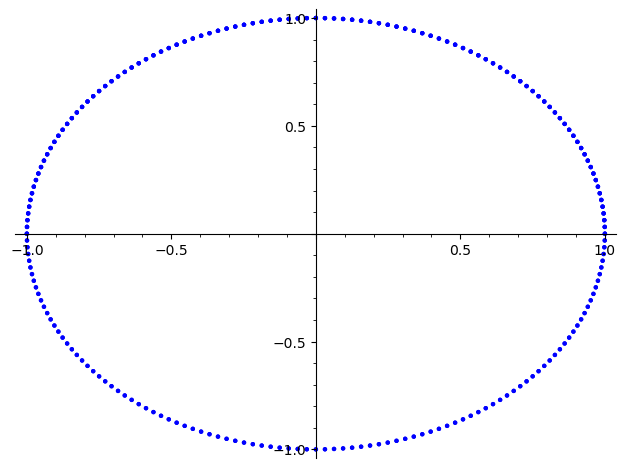

In [2]:
source=[]
for k in [0..500]:
    theta=((k/100)*pi)
    x=cos(theta)
    y=sin(theta)
    source=source+[[x,y]]
pl=list_plot(source)
show(pl)

In [13]:
source=[]
for k in [0..500]:
    theta=((k/100)*pi)
    x=cos(theta)
    y=sin(theta)
    source=source+[[x,y]]
def f(x): return 2*x
target=[]
for s in source:
    target=target+[f(s)]
pt=list_plot(target)
show(pt)

Graphics3d Object

In [ ]:
source=[]
for k in [0..500]:
    theta=((k/100)*pi)
    x=cos(theta)
    y=sin(theta)
    source=source+[x+I*y]
def f(x): return 2*x
target=[]
graph=[]
for s in source:
    graph=graph+[(f(s).real(),f(s).imag())]
pt=list_plot(graph)
show(pt)

In [ ]:
# from sage notebook `conjecture 1 tables'
data=[]
for m in [3..500]:
    if 10 in divisors(m):
        print(m)
    data=data+[[m,j(120,m)]]
import pickle
wfile = open('/Users/barrybrent/8mar21no6.txt','a')
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [ ]:
# from sage notebook `conjecture 1 tables'
import pickle
rfile = open('/Users/barrybrent/8mar21no6.txt','r')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/10mar21no8.txt','w')
enoughfile=[]
for qpower in [0..120]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=x*s[k][1] 
# times x because, to use polynomialCoefficient, I need a polynomial; not a Laurent series
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower-1,rl]] 
    finish = time.time()
    print([qpower,finish-start])
# -1 because I want to record the coefficients of the qpowers of the original Laurent series
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

In [8]:
# from sage notebook `conjecture 1 tables' (code updated)
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [1..15]:
    print("n: ",s[k][0])
    f=D(s[k][1])
    print(f)
    print()

n:  0
24*x^3 + 32*x

n:  1
276*x^6 - 32*x^4 - 192*x^2

n:  2
2048*x^9 - 237568/27*x^7 + 32768/27*x^5 + 131072/27*x^3

n:  3
11202*x^12 - 122272*x^10 + 332480*x^8 - 51712*x^6 - 155136*x^4

n:  4
49152*x^15 - 1072627712/1125*x^13 + 4173856768/675*x^11 - 45736787968/3375*x^9 + 1564475392/675*x^7 + 6257901568/1125*x^5

n:  5
184024*x^18 - 144266176/27*x^16 + 43337949824/729*x^14 - 217405085696/729*x^12 + 140124878848/243*x^10 - 77900890112/729*x^8 - 155801780224/729*x^6

n:  6
614400*x^21 - 3105702576128/128625*x^19 + 3087576727552/7875*x^17 - 181127478771712/55125*x^15 + 605256780087296/42875*x^13 - 39732717289472/1575*x^11 + 276526671069184/55125*x^9 + 1106106684276736/128625*x^7

n:  7
1881471*x^24 - 105854663648/1125*x^22 + 61647569321408/30375*x^20 - 2214841137463808/91125*x^18 + 15555313881637376/91125*x^16 - 4024369502937088/6075*x^14 + 102528260099096576/91125*x^12 - 21727588469571584/91125*x^10 - 10863794234785792/30375*x^8

n:  8
5373952*x^27 - 10273321450471424/31255875*x^25 + 2

In [11]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [1..3]:
    print("n: ",s[k][0])
    f=D(s[k][1])
    print(f)
    var('x')
    expr=str(f)
    expr=sage_eval(expr,locals={'x':1})
    print(expr)
    print("------------------------------------------------------------")

n:  0
24*x^3 + 32*x
56
------------------------------------------------------------
n:  1
276*x^6 - 32*x^4 - 192*x^2
52
------------------------------------------------------------
n:  2
2048*x^9 - 237568/27*x^7 + 32768/27*x^5 + 131072/27*x^3
-2048/3
------------------------------------------------------------


In [ ]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [1..3]:
    print("n: ",s[k][0])
    f=D(s[k][1])
    print(f)
    var('x')
    expr=str(f)
    expr=sage_eval(expr,locals={'x':1})
    print(expr)
    print("------------------------------------------------------------")

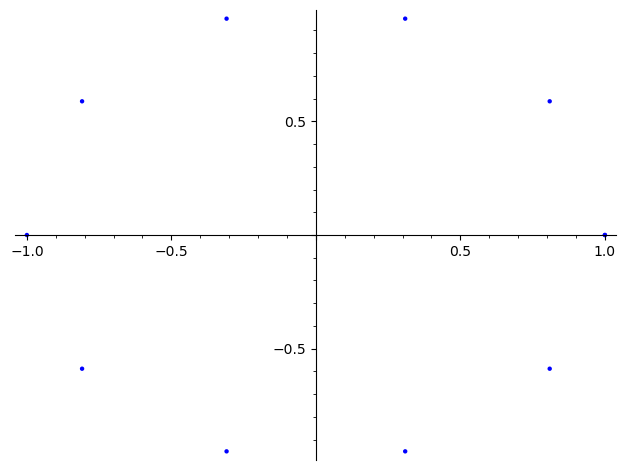

In [6]:
fineness=10
source=[]
for kk in [0..fineness]:
    theta=((kk/fineness)*2*pi)
    x=cos(theta)
    y=sin(theta)
    source=source+[x+I*y]
pl=list_plot(source)
show(pl)

In [ ]:
24*x^3 + 32*x

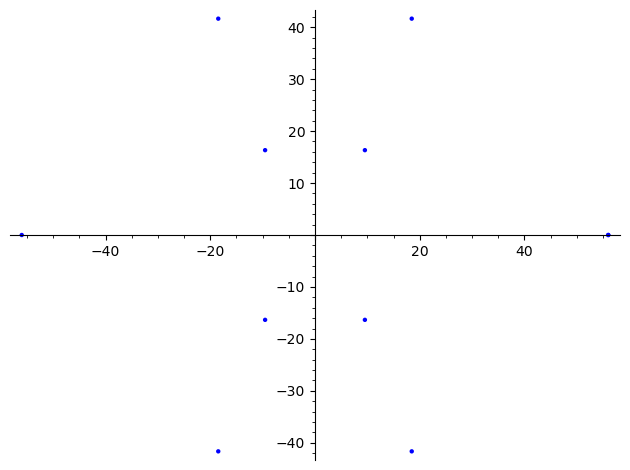

In [11]:
data=[]
fineness=10
for k in [0..fineness]:
    theta=((k/fineness)*2*pi)
    x=cos(theta)
    y=sin(theta)
    z=x+I*y
    w=24*z^3+32*z
    pair=[w.real(),w.imag(w)]
    data=data+[pair]
    
pl=list_plot(data)
show(pl)

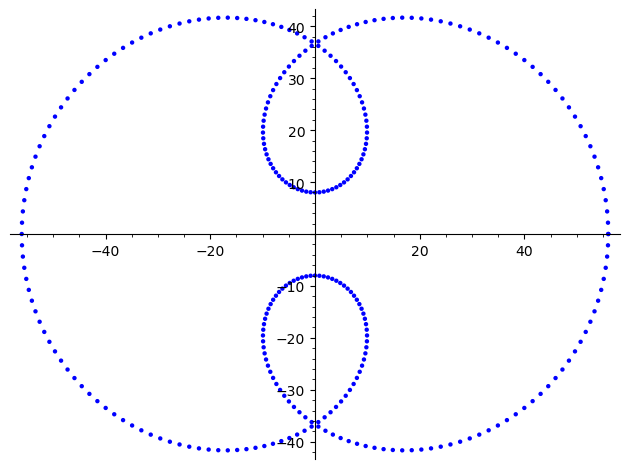

In [13]:
data=[]
fineness=300
for k in [0..fineness]:
    theta=((k/fineness)*2*pi)
    x=cos(theta)
    y=sin(theta)
    z=x+I*y
    w=24*z^3+32*z
    pair=[w.real(),w.imag(w)]
    data=data+[pair]
    
pl=list_plot(data)
show(pl)

*************************************************************
n:  0
24*x^3 + 32*x


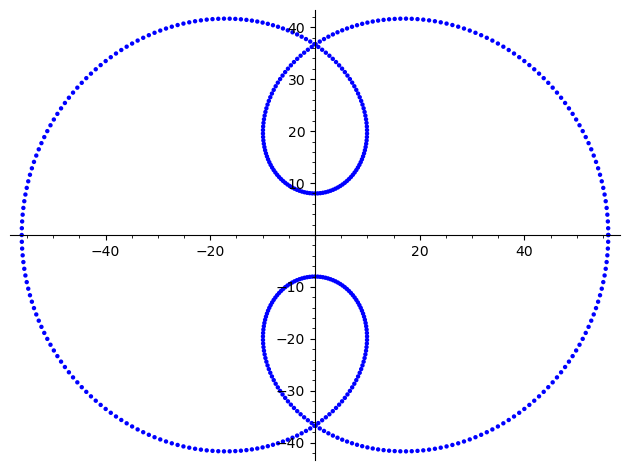

*************************************************************
n:  1
276*x^6 - 32*x^4 - 192*x^2


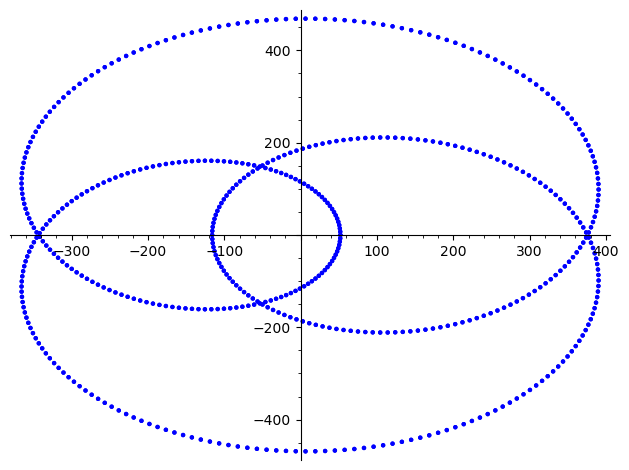

*************************************************************
n:  2
2048*x^9 - 237568/27*x^7 + 32768/27*x^5 + 131072/27*x^3


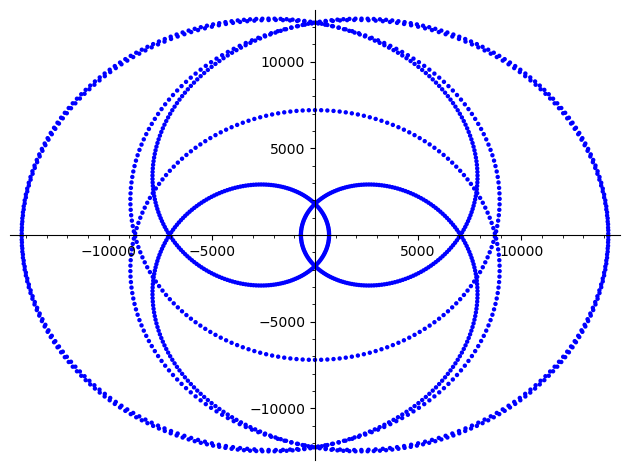

In [22]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [1..3]:
    print("*************************************************************")
    print("n: ",s[k][0])
    f=D(s[k][1])
    print(f)
    def ff(u):
        expr=str(f)
        expr=sage_eval(expr,locals={'x':u})
        return expr
    data=[]
    fineness=500*k
    for kk in [0..fineness]:
        theta=((kk/fineness)*2*pi)
        x=cos(theta)
        y=sin(theta)
        z=x+I*y
        w=ff(z)
        pair=[w.real(),w.imag(w)]
        data=data+[pair]
    pl=list_plot(data)
    show(pl)

*************************************************************
n:  0
24*x^3 + 32*x
radius:  1


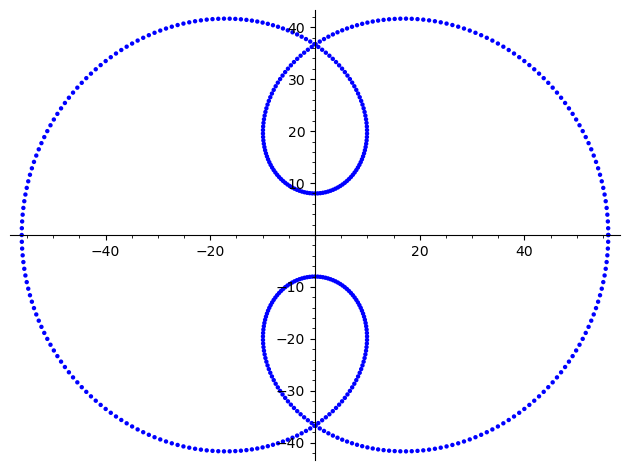

*************************************************************
n:  0
24*x^3 + 32*x
radius:  2


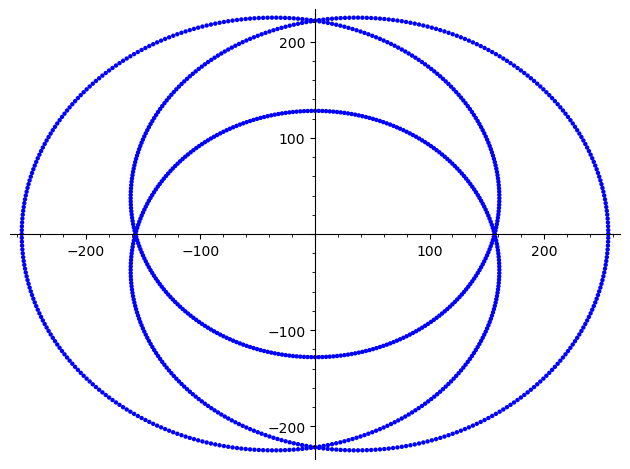

*************************************************************
n:  0
24*x^3 + 32*x
radius:  3


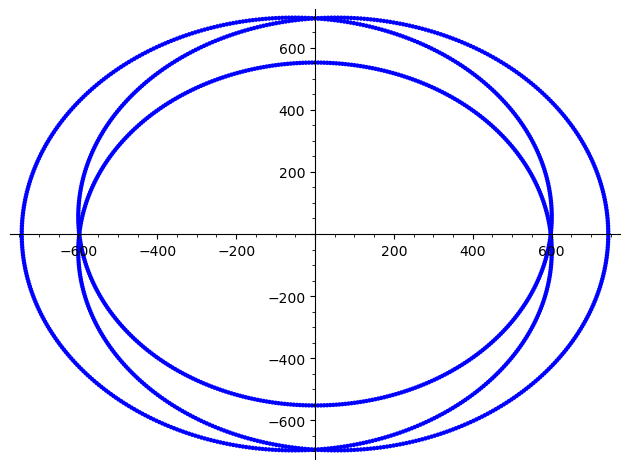

*************************************************************
n:  0
24*x^3 + 32*x
radius:  4


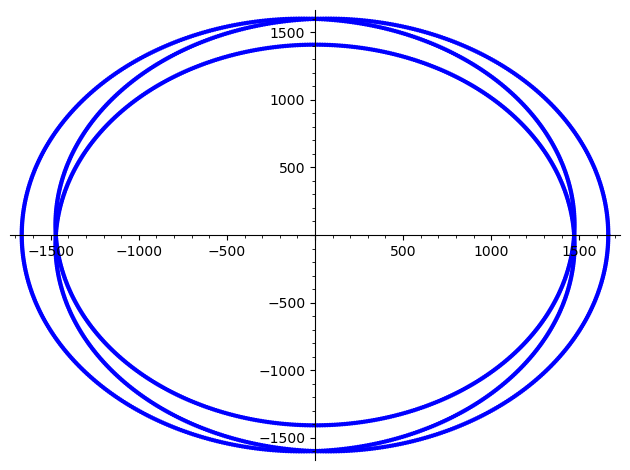

*************************************************************
n:  0
24*x^3 + 32*x
radius:  5


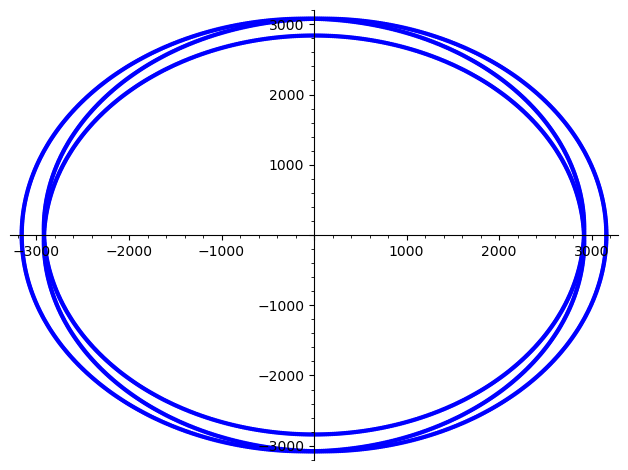

In [25]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for radius in [1..5]:
    print("*************************************************************")
    print("n: ",s[1][0])
    f=D(s[1][1])
    print(f)
    print("radius: ",radius)
    def ff(u):
        expr=str(f)
        expr=sage_eval(expr,locals={'x':u})
        return expr
    data=[]
    fineness=500*radius
    for kk in [0..fineness]:
        theta=((kk/fineness)*2*pi)
        x=cos(theta)
        y=sin(theta)
        z=x+I*y
        w=ff(z*radius)
        pair=[w.real(),w.imag(w)]
        data=data+[pair]
    pl=list_plot(data)
    show(pl)

*************************************************************
n:  0
24*x^3 + 32*x
radius:  1


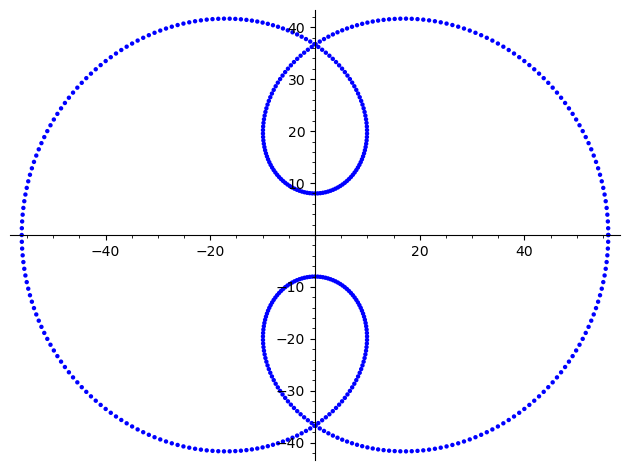

*************************************************************
n:  0
24*x^3 + 32*x
radius:  1/2


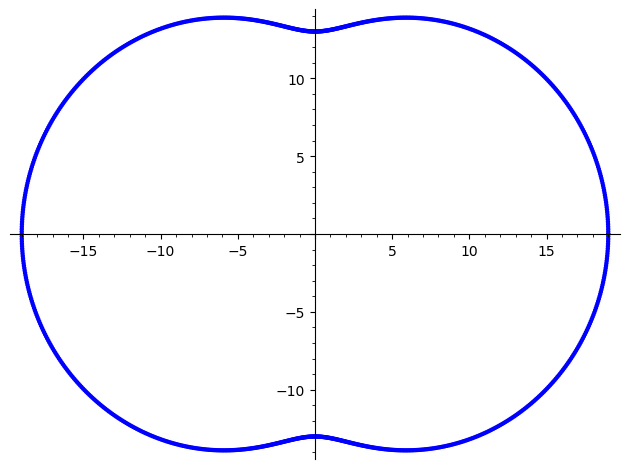

*************************************************************
n:  0
24*x^3 + 32*x
radius:  1/3


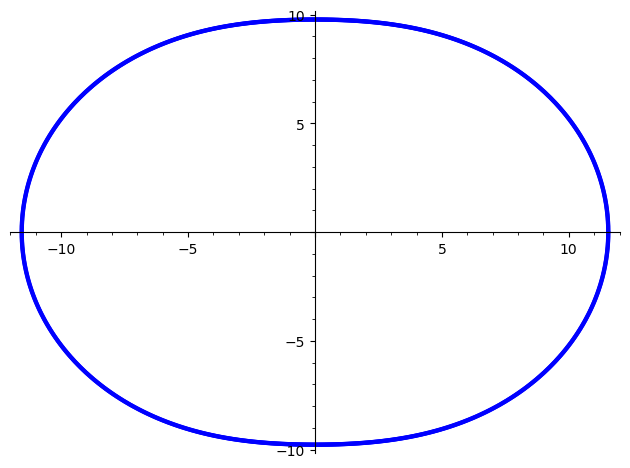

*************************************************************
n:  0
24*x^3 + 32*x
radius:  1/4


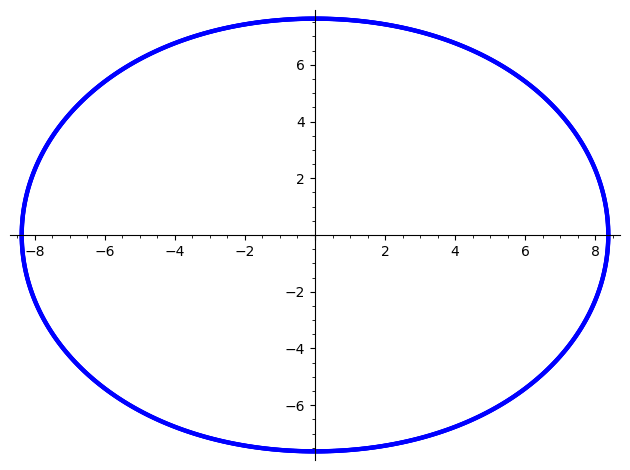

*************************************************************
n:  0
24*x^3 + 32*x
radius:  1/5


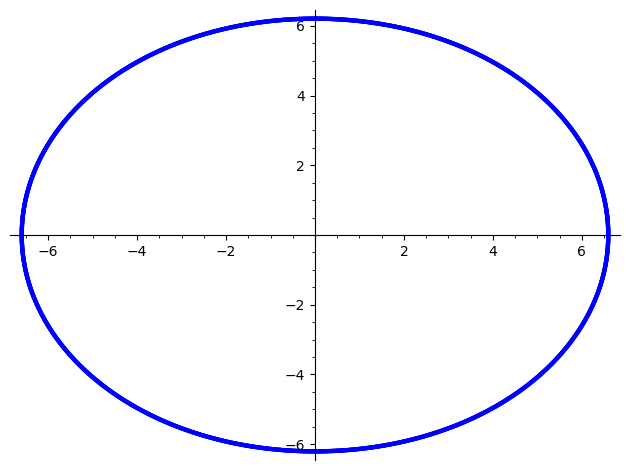

In [26]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for recipradius in [1..5]:
    print("*************************************************************")
    print("n: ",s[1][0])
    f=D(s[1][1])
    print(f)
    print("radius: ",1/recipradius)
    def ff(u):
        expr=str(f)
        expr=sage_eval(expr,locals={'x':u})
        return expr
    data=[]
    fineness=500*recipradius
    for kk in [0..fineness]:
        theta=((kk/fineness)*2*pi)
        x=cos(theta)
        y=sin(theta)
        z=x+I*y
        w=ff(z/recipradius)
        pair=[w.real(),w.imag(w)]
        data=data+[pair]
    pl=list_plot(data)
    show(pl)